# Analysis of Moroccan Socio-Economic Indicators

This notebook analyzes selected socio-economic indicators for Morocco
using data from the World Bank.

The data was ingested, cleaned, and stored in PostgreSQL as part of a
data engineering pipeline.

## Imports & Database Connection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
DB_USER = "imane"
DB_PASSWORD = "daTa_sLop4309!"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "moroccan_data"

In [3]:
engine = create_engine(
    f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

## Load Data from PostgreSQL

In [4]:
query = """
SELECT year, indicator_code, indicator_name, value
FROM socio_economic_indicators
ORDER BY year;
"""
df = pd.read_sql(query, engine)
df.head()


,year,indicator_code,indicator_name,value
0,2015,SP.POP.TOTL,"Population, total",3.460759e+07
1,2015,NY.GDP.MKTP.CD,GDP (current US$),1.104138e+11
2,2015,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",9.460000e+00
3,2015,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",7.289400e+01
4,2016,SP.POP.TOTL,"Population, total",3.502346e+07


## GDP Trend

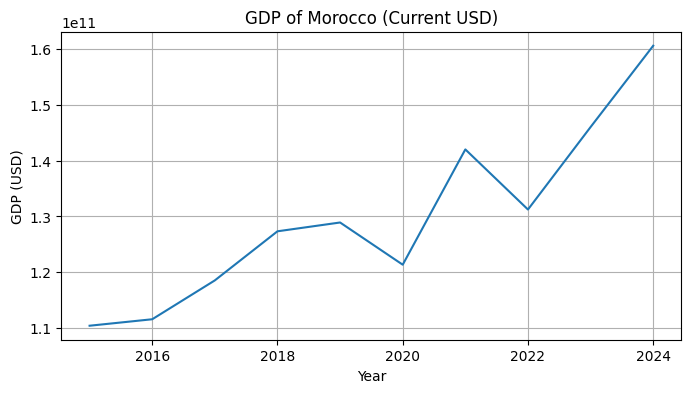

In [5]:
gdp = df[df["indicator_code"] == "NY.GDP.MKTP.CD"]
plt.figure(figsize=(8, 4))
plt.plot(gdp["year"], gdp["value"])
plt.title("GDP of Morocco (Current USD)")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.grid(True)
plt.show()


The plot shows a general upward trend in Morocco's GDP over time,
with some fluctuations depending on economic conditions.

## Unemployment Rate Trend

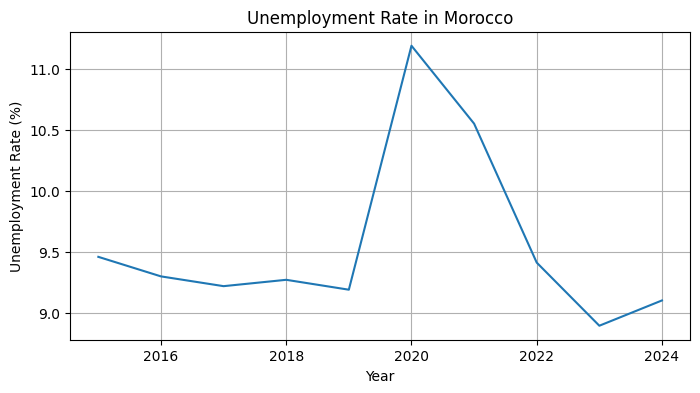

In [6]:
unemployment = df[df["indicator_code"] == "SL.UEM.TOTL.ZS"]
plt.figure(figsize=(8, 4))
plt.plot(unemployment["year"], unemployment["value"])
plt.title("Unemployment Rate in Morocco")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


The unemployment rate shows moderate variations over the years,
highlighting periods of economic pressure.

## Population Evolution

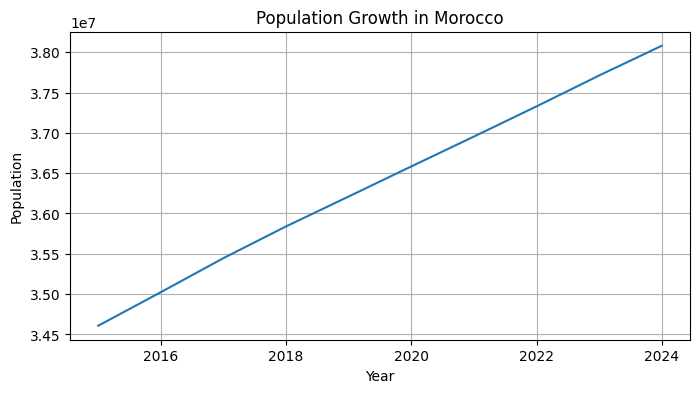

In [7]:
population = df[df["indicator_code"] == "SP.POP.TOTL"]
plt.figure(figsize=(8, 4))
plt.plot(population["year"], population["value"])
plt.title("Population Growth in Morocco")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

This analysis demonstrates how cleaned and structured public data
can be stored in a relational database and analyzed using Python
and SQL to extract meaningful insights.